# Práctica 08: Análisis Estadístico Avanzado de Datos usando las librerias: Scipy, itertools y wordcloud

##### Creado por: Yulissa Ortega Cuevas Matricula: 220875

##### Asignatura: Extracción de Conocimiento de Bases de Datos

##### PE: Ingeniería en Desarrollo y Gestión de Software - 9B

In [2]:
# Carga de paquetes y Librerías a utilizar

# Básicos (Standard)

import numpy as np # Sirve para poder realizar procesamientos básicos númericos en datos cuantitativos
import pandas as pd # Sirve para realizar los procesos ETL es un conjunto de datos
import time # Sirve para la manipulación de datos en diferentes formatos de tiempo

#Gratificadores (Plats)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### 1. Importar el origen de los datos

In [3]:
!cd 
!dir

C:\Users\ti_la\Downloads\Practica 08
 El volumen de la unidad C es OS
 El número de serie del volumen es: 06DF-BDAA

 Directorio de C:\Users\ti_la\Downloads\Practica 08

26/06/2025  01:26 p. m.    <DIR>          .
26/06/2025  01:22 p. m.    <DIR>          ..
26/06/2025  01:24 p. m.    <DIR>          .ipynb_checkpoints
26/06/2025  01:26 p. m.            17,225 Práctica08.ipynb
10/06/2025  02:23 p. m.         4,127,529 salaries.csv
               2 archivos      4,144,754 bytes
               3 dirs  34,799,529,984 bytes libres


In [4]:
!dir

 El volumen de la unidad C es OS
 El número de serie del volumen es: 06DF-BDAA

 Directorio de C:\Users\ti_la\Downloads\Practica 08

26/06/2025  01:26 p. m.    <DIR>          .
26/06/2025  01:22 p. m.    <DIR>          ..
26/06/2025  01:24 p. m.    <DIR>          .ipynb_checkpoints
26/06/2025  01:26 p. m.            17,225 Práctica08.ipynb
10/06/2025  02:23 p. m.         4,127,529 salaries.csv
               2 archivos      4,144,754 bytes
               3 dirs  34,799,579,136 bytes libres


Importamos los datos en una nueva

In [5]:
df = pd.read_csv('salaries.csv')

Corroboramos el tipo de datos de nuestro objeto

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73154 entries, 0 to 73153
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73153 non-null  float64
 1   experience_level    73153 non-null  object 
 2   employment_type     73148 non-null  object 
 3   job_title           73149 non-null  object 
 4   salary              73150 non-null  float64
 5   salary_currency     73148 non-null  object 
 6   salary_in_usd       73150 non-null  float64
 7   employee_residence  73153 non-null  object 
 8   remote_ratio        73149 non-null  float64
 9   company_location    73154 non-null  object 
 10  company_size        73148 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB


### 5. Estadística avanzada

#### Step 1 | Library & Configurations

In [11]:
%%time

# Installing select libraries:-
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages

import re # regular expressions

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats # statistical functions

from itertools import cycle, combinations  # Igenerating combinations & cycle

import matplotlib.pyplot as plt # data visualization
from matplotlib.ticker import FuncFormatter  # For custom formatting of ticks
from matplotlib.ticker import FormatStrFormatter  # For formatting ticks with a string
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D axes module
from matplotlib.colors import ListedColormap  # Importing colormap for scatter plot
import seaborn as sns # statistical data visualization
from wordcloud import WordCloud  # Importing WordCloud library for textual data visualization

from io import StringIO

filterwarnings('ignore'); # Ignore warning messages
from IPython.display import display, HTML, display_html, clear_output; # displaying HTML content


clear_output();
print();
collect();


CPU times: total: 62.5 ms
Wall time: 88.1 ms


In [13]:
# Set the plot style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(10, 10)})
print(f"Succesfully Configured libraries!")

Succesfully Configured libraries!


#### Step 2 | Load Dataset

In [24]:
%%time

# Error Handling When Loading Dataset with Pandas read_csv

try:
    # Attempt to read the dataset
    df = pd.read_csv('global_ai_ml_data_salaries.csv')
    print(f"Dataset loaded successfully.")
    
except FileNotFoundError:
    # Handle FileNotFoundError if the file does not exist
    print(f"Error: File not found. Please check the file path.")

except Exception as e:
    # Handle other exceptions
    print(f"An error occurred while loading the dataset: {e}")

print()
collect();

Dataset loaded successfully.

CPU times: total: 62.5 ms
Wall time: 142 ms


#### Step 3 | Attribute Overview

In [34]:
def display_dataframe_with_custom_header(df, show_head=False):
    print(f"{'DataFrame Info:':-^50}")
    print(df.info())
    print()
    
    print(f"{'DataFrame Shape:':-^50}")
    print(df.shape)
    print()
    
    print(f"{'DataFrame Columns:':-^50}")
    print(df.columns.tolist())
    print()
    
    if show_head:
        print(f"{'DataFrame Head:':-^50}")
        display(df.head())

In [35]:
display_dataframe_with_custom_header(df)  # Display info
display_dataframe_with_custom_header(df, show_head=True)  # Display head

-----------------DataFrame Info:------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20565 entries, 0 to 20564
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           20565 non-null  int64 
 1   experience_level    20565 non-null  object
 2   employment_type     20565 non-null  object
 3   job_title           20565 non-null  object
 4   salary              20565 non-null  int64 
 5   salary_currency     20565 non-null  object
 6   salary_in_usd       20565 non-null  int64 
 7   employee_residence  20565 non-null  object
 8   remote_ratio        20565 non-null  int64 
 9   company_location    20565 non-null  object
 10  company_size        20565 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.7+ MB
None

-----------------DataFrame Shape:-----------------
(20565, 11)

----------------DataFrame Columns:----------------
['work_year', 'experience_level', 'employment

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Research Engineer,284900,USD,284900,US,0,US,M
1,2024,SE,FT,Research Engineer,161700,USD,161700,US,0,US,M
2,2024,MI,FT,Research Engineer,138000,USD,138000,US,0,US,M
3,2024,MI,FT,Research Engineer,86000,USD,86000,US,0,US,M
4,2024,SE,FT,Research Engineer,179000,USD,179000,US,0,US,M


#### Step 4 | Missing Value Handling

In [36]:
def plot_missing_values_heatmap(df):
    null_counts = df.isnull().sum()
    null_percentage = null_counts / len(df)

    if null_counts.sum() == 0:
        print("No missing values in the dataset.")
        # Pero aún así mostramos una "gráfica vacía"
        plt.figure(figsize=(12, 6))
        sns.barplot(x=null_counts.index, y=null_counts.values, palette="copper")
        plt.title("Count of Missing Values", fontsize=14, color="orangered")
        for i, v in enumerate(null_counts.values):
            plt.text(i, v + 0.1, str(v), ha='center', va='bottom', color='white', fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.grid(False)
        plt.show()
        return

    plt.figure(figsize=(12, 6))
    sns.barplot(x=null_counts.index, y=null_counts.values, palette="copper")
    plt.title("Count of Missing Values", fontsize=14, color="orangered")
    for i, v in enumerate(null_counts.values):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', color='white', fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(False)
    plt.show()

No missing values in the dataset.


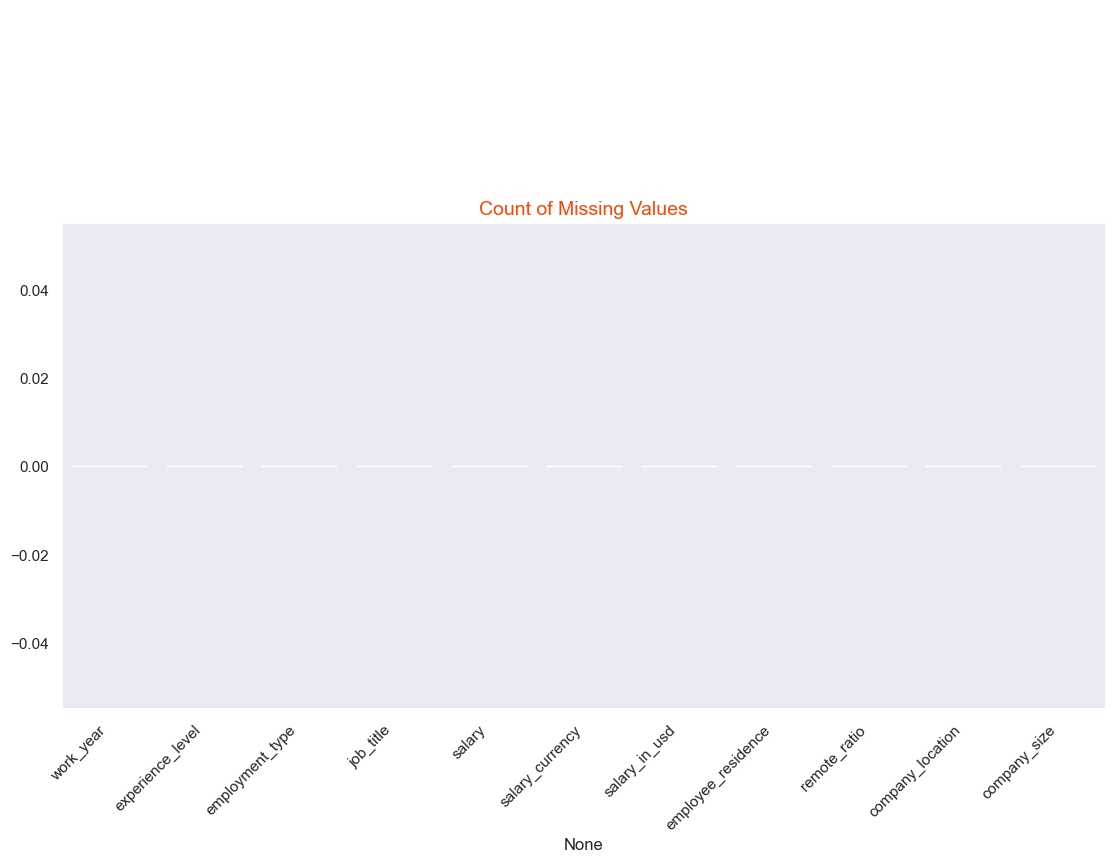

In [37]:
# Call the function to plot the heatmap
plot_missing_values_heatmap(df)

#### Step 5 | Duplicate Value Manage

In [41]:
# Checking the duplicate values in the data
duplicate_values = df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

The data contains 8668 duplicate values


In [44]:
def apply_duplicated_styling(df):
    duplicated_cols = df.T.duplicated()
    return pd.DataFrame(duplicated_cols, index=df.columns).style.applymap(
        lambda v: 'color: blue; font-weight: bold' if v else 'color: green'
    )

In [45]:
# checks for duplicates among the columns of the DataFrame.
styled_df = apply_duplicated_styling(df)
styled_df

,0
work_year,False
experience_level,False
employment_type,False
job_title,False
salary,False
salary_currency,False
salary_in_usd,False
employee_residence,False
remote_ratio,False
company_location,False


#### Step 6 | Statistical Data Summary

##### Calcular las medidas de tendencia central de nuestro dataframe

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import iqr, skew, kurtosis

def calcular_estadisticas(df, opacity=1.0, font_size='14px'):
    columnas_numericas = df.select_dtypes(include=np.number).columns
    stats = {}

    for col in columnas_numericas:
        serie = df[col].dropna()
        stats[col] = [
            round(serie.mean(), 2),                     # Mean
            round(serie.median(), 2),                   # Median
            round(serie.mode().iloc[0], 2),             # Mode
            round(serie.max() - serie.min(), 2),        # Range
            round(serie.std(), 2),                      # Stdev
            round(serie.var(), 2),                      # Variance
            round(iqr(serie), 2),                       # IQR
            round(serie.quantile(0.25), 2),             # 25%
            round(serie.quantile(0.50), 2),             # 50%
            round(serie.quantile(0.75), 2),             # 75%
            round(serie.min(), 2),                      # Min
            round(serie.max(), 2),                      # Max
            round(skew(serie), 2),                      # Skewness
            round(kurtosis(serie), 2)                   # Kurtosis
        ]

    # Crear DataFrame con métricas como filas y columnas como encabezado
    orden_metricas = [
        'Mean', 'Median', 'Mode', 'Range', 'Stdev', 'Variance', 'IQR',
        '25%', '50%', '75%', 'Min', 'Max', 'Skewness', 'Kurtosis'
    ]

    stats_df = pd.DataFrame(stats, index=orden_metricas)

    return stats_df.style.set_table_attributes(f'style="opacity:{opacity}; font-size:{font_size};"')

In [8]:
stats_df = calcular_estadisticas(df)
stats_df

,work_year,salary,salary_in_usd,remote_ratio
Mean,2023.830000,162834.710000,158011.200000,21.580000
Median,2024.000000,148000.000000,147500.000000,0.000000
Mode,2024.000000,160000.000000,160000.000000,0.000000
Range,5.000000,30386000.000000,785000.000000,100.000000
Stdev,0.480000,197488.630000,72501.930000,41.020000
Variance,0.230000,39001759665.110001,5256529815.310000,1682.880000
IQR,0.000000,93040.000000,92810.000000,0.000000
25%,2024.000000,106960.000000,106890.000000,0.000000
50%,2024.000000,148000.000000,147500.000000,0.000000
75%,2024.000000,200000.000000,199700.000000,0.000000


In [45]:
stats_df = calcular_estadisticas(df_vacios_eliminados)